In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

mg_ml = pd.read_csv('mg_ml_rescaled.csv')
mg_ml = mg_ml.drop(columns=list(mg_ml.columns)[0], axis=1)

Y = mg_ml['default_status']
X = mg_ml.drop(columns=['balance_time','default_status'], axis=1)

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

# Stratified split of the train and test set with train-test ratio of 7.5:2.5
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, 
                                            stratify=Y, random_state=42)

## Modeling

In [3]:
# Import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

# Instantiate KNeighborsClassifier
clf = KNeighborsClassifier()

# Fit the classifier
clf.fit(X_train, Y_train)

# Predict on the test set
test_preds = clf.predict(X_test)

In [4]:
# Import the necessary functions
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

# Complete the function
def print_metrics(labels, preds):
    print("Precision Score: {}".format(precision_score(labels, preds)))
    print("Recall Score: {}".format(recall_score(labels, preds)))
    print("Accuracy Score: {}".format(accuracy_score(labels, preds)))
    print("F1 Score: {}".format(f1_score(labels, preds)))
    
print_metrics(Y_test, test_preds)

Precision Score: 0.5122818358112475
Recall Score: 0.41842661034846884
Accuracy Score: 0.70304
F1 Score: 0.46062191223481547


## Fine Tune using F1

In [5]:
# search for an optimal value of K for KNN
k_range = list(range(1, 11))
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, Y_train)
    Y_predict = knn.predict(X_test)
    score = f1_score(Y_test, Y_predict)
    k_scores.append(score)
print(k_scores)

[0.4433381370365518, 0.3198099415204678, 0.46093858794039827, 0.38221153846153844, 0.46062191223481547, 0.39688715953307396, 0.47439670394349615, 0.4200595829195631, 0.47630296766573155, 0.43130265716137395]


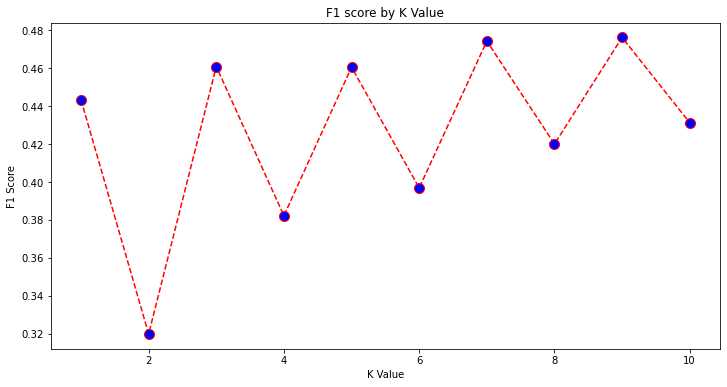

In [6]:
import matplotlib.pyplot as plt  

plt.figure(figsize=(12, 6))  
plt.plot(range(1, 11), k_scores, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('F1 score by K Value')  
plt.xlabel('K Value')  
plt.ylabel('F1 Score') 
plt.show()

In [29]:
from sklearn.metrics import f1_score, accuracy_score, roc_auc_score, plot_confusion_matrix, plot_roc_curve

# Instantiate KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=9, weights = "uniform")

# Fit the classifier
clf.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=9)

## Test Set Performance

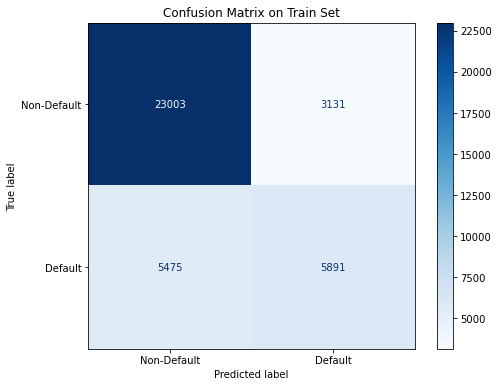

In [30]:
fig, ax = plt.subplots(figsize=(8, 6))
plot_confusion_matrix(clf, X_train, Y_train, display_labels=['Non-Default', 'Default'], 
                      cmap=plt.cm.Blues, ax=ax)
ax.set_title('Confusion Matrix on Train Set')
plt.show()

In [31]:
Y_train_pred = clf.predict(X_train)
Y_train_proba = clf.predict_proba(X_train)

print('Train Acc:', accuracy_score(Y_train, Y_train_pred))
print('Train F1:', f1_score(Y_train, Y_train_pred))
print('Train ROC AUC:', roc_auc_score(Y_train, Y_train_proba[:, 1]))

Train Acc: 0.7705066666666667
Train F1: 0.5778889542868354
Train ROC AUC: 0.8227457953305289


## Test Set Performance

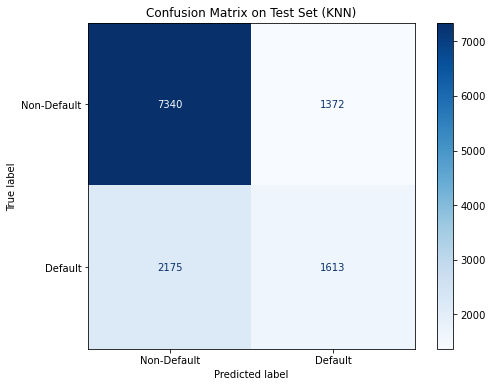

In [34]:
from sklearn.metrics import f1_score, accuracy_score, roc_auc_score, plot_confusion_matrix, plot_roc_curve

# Instantiate KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=9)

# Fit the classifier
clf.fit(X_train, Y_train)

# Confusion matrix
fig, ax = plt.subplots(figsize=(8, 6))
plot_confusion_matrix(clf, X_test, Y_test, display_labels=['Non-Default', 'Default'], 
                      cmap=plt.cm.Blues, ax=ax)
ax.set_title('Confusion Matrix on Test Set (KNN)')
plt.show()

In [33]:

# Predict on the test set
Y_test_pred = clf.predict(X_test)
Y_test_proba = clf.predict_proba(X_test)

print('test Acc:', accuracy_score(Y_test, Y_test_pred))
print('test F1:', f1_score(Y_test, Y_test_pred))
print('test ROC AUC:', roc_auc_score(Y_test, Y_test_proba[:, 1]))

test Acc: 0.71624
test F1: 0.47630296766573155
test ROC AUC: 0.7230530138187092
